# Control the density profiles stabilisation atempt using GSW package of the original WOA09 dataset 

In [15]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
import gsw as gsw
from netCDF4 import Dataset


from matplotlib import rcParams
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [16]:
! date

Mon Apr  7 15:33:26 CEST 2025


In [17]:
def Arc_Bat(ztype='isol1000') :
        locpath='/data0/project/drakkar/CONFIGS/CREG025.L75/GRID/'
        locfile='CREG025.L75_domain_cfg.nc'
        fieldbat=Dataset(locpath+locfile)
        lon  = np.squeeze(fieldbat.variables['nav_lon'])
        lat  = np.squeeze(fieldbat.variables['nav_lat'])
        My_var = np.squeeze(fieldbat.variables['bathy_meter'])

        spval = 0.
        My_var= np.ma.masked_where(My_var <= spval,My_var)

        if ztype == 'isol1000' :
                vmin=1000. ; vmax=2000.
                contours=[1000.]
                limits=[vmin,vmax]
                myticks=[1000.]
        elif ztype == 'isol1500' :
                vmin=1500. ; vmax=2000.
                contours=[1500.]
                limits=[vmin,vmax]
                myticks=[1500.]
        elif ztype == 'isomonarc' :
                vmin=500. ; vmax=4000.
                contours=[500.,2000.,4000.]
                limits=[vmin,vmax]
                myticks=[500.,2000.,4000.]
        elif ztype == 'isol500' :
                vmin=500. ; vmax=500.
                contours=[500.]
                limits=[vmin,vmax]
                myticks=[500.]
        else:
                vmin=0. ; vmax=8000.
                contours=[100.,500.,1000.,2000.,3000.,3500.,4000.]
                limits=[vmin,vmax]
                myticks=[100.,500.,1000.,2000.,3000.,3500.,4000.]

        #
        #rcParams['text.latex.unicode']=True
        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')
        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
        pal = plt.cm.get_cmap('binary')
        X,Y = m(lon,lat)

        # contour (optional)
        CS2 = m.contour(X, Y, My_var, linewidths=0.5,levels=contours, colors='black', alpha=1.)
        plt.clabel(CS2, CS2.levels, inline=True, fmt='%.0f', fontsize=3)

        return m, X, Y


In [18]:
def Arc_plot(lon,lat,tab,contours,limits,myticks=None,name=None,zmy_cblab=None,zmy_cmap=None,filename='test.pdf',zvar=None):
        #
# Les 2 lignes suivantes posent un probleme a l'execution lie a LaTex ....
#       rcParams['text.usetex']=True
#       rcParams['text.latex.unicode']=True
        #rcParams['font.family']='serif'

        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')

        if zvar == 'sivolu' or zvar == 'siconc'  or zvar == 'ssh' or zvar == 'socurl' :
                zfontsize=10.
        else:
                zfontsize=6.

        if zvar != 'Bathy' :
                m.drawparallels(np.arange(-90.,91.,5.),labels=[False,False,False,False], size=zfontsize, linewidth=0.3)
                m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True], size=zfontsize, latmax=90.,linewidth=0.3)
                m.fillcontinents(color='grey',lake_color='white')

        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])

        if zmy_cmap != None :
                pal = zmy_cmap
        else:
                pal = plt.cm.get_cmap('coolwarm')
                #pal = plt.cm.get_cmap('terrain')

        X,Y = m(lon,lat)
        C = m.contourf(X,Y,tab,contours,cmap=pal,norm=norm,extend='both')
        if zvar == 'ssh':
                CS=m.contour(X, Y, tab, linewidths=0.5, levels=npy.arange(limits[0],limits[1],5.), colors='k', alpha=0.4)

        ############################################################################################################
        ############################################################################################################
        moorplot=0
        if moorplot == 1 :
                bx_ARCB={'name':'B'  ,'lon_min':-150.,'lon_max':-150.,'lat_min':78.,'lat_max':78.}
                bx_ARCM={'name':'M1' ,'lon_min': 125.,'lon_max': 125.,'lat_min':78.,'lat_max':78.}
                bx_EURA={'name':'EUR','lon_min':  60.,'lon_max':  60.,'lat_min':85.,'lat_max':85.}

                All_box=[bx_ARCB,bx_EURA]
                for box in All_box:
                        lats = [box['lat_min'],box['lat_max']]
                        lons = [box['lon_min'],box['lon_max']]
                        x,y = m(lons,lats)
                        m.scatter(x,y,3,marker='o', color='r')
                        #m.plot(x,y,linewidth=2, color='g')
        ############################################################################################################
        ############################################################################################################

        # colorbar      
        if myticks is None:
                cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8)
        else:
                if zvar == 'votemper' or zvar == 'vosaline' or zvar == 'sivolu' :
                        cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8,drawedges=True)
                else:
                        cbar = plt.colorbar(C,format='%.0f',orientation='vertical',shrink=0.8,drawedges=True)

                cbar.set_label(zmy_cblab,fontsize=zfontsize)
                cl = plt.getp(cbar.ax, 'ymajorticklabels')
                plt.setp(cl, fontsize=zfontsize)

        plt.title(name,fontsize=zfontsize)

        return m

>>>> # Read input fields

In [19]:
INDIR='/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-I/'
ds_inT=xr.open_mfdataset(INDIR+'woa09_ConTem_monthly_1deg_CT_CMA_drowned_Ex_L75_TS_Stabilise.nc',decode_times=False)
ds_inT
ds_inS=xr.open_mfdataset(INDIR+'woa09_SalAbs_monthly_1deg_SA_CMA_drowned_Ex_L75_TS_Stabilise.nc',decode_times=False)
ds_inS

<xarray.Dataset>
Dimensions:  (time_counter: 12, z: 75, lat0: 180, lon0: 360)
Dimensions without coordinates: time_counter, z, lat0, lon0
Data variables:
    SA       (time_counter, z, lat0, lon0) float64 dask.array<chunksize=(12, 75, 180, 360), meta=np.ndarray>

In [20]:
ds_latlonZ=xr.open_dataset(INDIR+'woa09_depth_Ex_L75.nc')
ds_latlonZ

<xarray.Dataset>
Dimensions:  (time_counter: 12, z: 75, lat0: 180, lon0: 360)
Dimensions without coordinates: time_counter, z, lat0, lon0
Data variables:
    depth    (time_counter, z, lat0, lon0) float32 ...
    lat      (lat0, lon0) float32 ...
    lon      (lat0, lon0) float32 ...

In [21]:
# Add the geographical coordinates
ds_IN=xr.Dataset()
ds_IN['SA']=(('time_counter','depth','lat0','lon0'),ds_inS['SA'].data)
ds_IN['CT']=(('time_counter','depth','lat0','lon0'),ds_inT['CT'].data)
ds_IN.coords['lat']=ds_latlonZ['lat']
ds_IN.coords['lon']=ds_latlonZ['lon']
ds_IN.coords['depth']=ds_latlonZ['depth']
ds_IN

<xarray.Dataset>
Dimensions:  (time_counter: 12, depth: 75, lat0: 180, lon0: 360, z: 75)
Coordinates:
    lat      (lat0, lon0) float32 ...
    lon      (lat0, lon0) float32 ...
    depth    (time_counter, z, lat0, lon0) float32 ...
Dimensions without coordinates: time_counter, lat0, lon0, z
Data variables:
    SA       (time_counter, depth, lat0, lon0) float64 dask.array<chunksize=(12, 75, 180, 360), meta=np.ndarray>
    CT       (time_counter, depth, lat0, lon0) float64 dask.array<chunksize=(12, 75, 180, 360), meta=np.ndarray>

In [22]:
#lat2D=np.tile(ds_IN['lat'],(ds_IN.sizes['lon'],1)).T
lat3D=np.tile(ds_IN['lat'],(75,1,1))
lat3D.shape
#zplt=np.reshape(ds_IN['depth'][0,:,].data,(24,1,1))
#zplt.shape
# Duplicate this depth to fit the T/S on a global grid
#z3D=np.tile(zplt,(1,ds_IN.sizes['lat'],ds_IN.sizes['lon']))
#z3D.shape

(75, 180, 360)

In [23]:
#zlon=np.reshape(ds_IN['lon'].data,(1,ds_IN.sizes['lon0']))
lon2D=ds_IN['lon'].data
lon2D.shape

(180, 360)

In [24]:
z3D=ds_IN['depth'].isel(time_counter=0)

In [25]:
# Read origanal WOA09 data to get a lan/sea mask
INDIR='/data0/project/drakkar/REFERENCE_DATA/WOA2009/DATA/1degx1deg/'
ds_init=xr.open_mfdataset(INDIR+'woa09_temperature_monthly_1deg.nc',\
                          drop_variables=['t_mn','t_dd','t_dd','t_ma','t_sd','t_se','t_oa','t_gp'],\
                          decode_times=False)
ds_init

<xarray.Dataset>
Dimensions:           (lon: 360, lat: 180, depth: 24, time: 12, nv: 2)
Coordinates:
  * lon               (lon) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat               (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * depth             (depth) float32 0.0 10.0 20.0 ... 1.3e+03 1.4e+03 1.5e+03
  * time              (time) float32 15.0 46.0 75.0 106.0 ... 289.0 320.0 350.0
Dimensions without coordinates: nv
Data variables:
    lat_bnds          (lat, nv) float32 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds          (lon, nv) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
    climatology_bnds  (time, nv) float32 dask.array<chunksize=(12, 2), meta=np.ndarray>
    t_an              (time, depth, lat, lon) float32 dask.array<chunksize=(12, 24, 180, 360), meta=np.ndarray>
    crs               int32 ...
Attributes: (12/40)
    CVS_ID:                     1.0
    Conventions:                CF-1.4
    id:                         75d70376-540c-4a1f-a0ca-f19f07dd7272
    naming_authority:           gov.noaa.nodc
    Metadata_Convention:        Unidata Dataset Discovery v1.0
    title:                      World Ocean Atlas 09:  Sea Water Temperature ...
    ...                         ...
    time_coverage_end:          2008-12-25
    time_coverage_duration:     P1Y
    time_coverage_resolution:   P1M
    processing_level:           synthesized product
    license:                    This data is free for anyone to use, reuse an...
    cdm_data_type:              Grid

In [47]:
# Shfit longitudes from 0,360 to -180/+180 as variables 
ds_init = ds_init.assign_coords(lon=(((ds_init.lon + 180) % 360) - 180))
ds_init = ds_init.sortby('lon')

In [48]:
# Need to convert latitudes & longitudes into 2D field and renames their dimensions
lat2D=np.tile(ds_init['lat'],(ds_init.sizes['lon'],1)).T

zlon=np.reshape(ds_init['lon'].data,(1,ds_init.sizes['lon']))
lon2D=np.tile(zlon,(ds_init.sizes['lat'],1))

In [49]:
lat2D.shape

(180, 360)

In [50]:
ds_woa09=xr.Dataset()
ds_woa09['t_an']=(('time','depth','lat0','lon0'),ds_init['t_an'].data)
ds_woa09.coords['lat']=(('lat0','lon0'),lat2D)
ds_woa09.coords['lon']=(('lat0','lon0'),lon2D)
ds_woa09

<xarray.Dataset>
Dimensions:  (time: 12, depth: 24, lat0: 180, lon0: 360)
Coordinates:
    lat      (lat0, lon0) float32 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5
    lon      (lat0, lon0) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: time, depth, lat0, lon0
Data variables:
    t_an     (time, depth, lat0, lon0) float32 dask.array<chunksize=(12, 24, 180, 360), meta=np.ndarray>

In [70]:
# Define a pressure from depth
pressure=gsw.p_from_z(-z3D,lat3D)

#ds_IN['SA']=gsw.conversions.SA_from_SP(ds_IN['s_an'],pressure,ds_IN['lon'],ds_IN['lat'])
#ds_IN['CT']=gsw.conversions.CT_from_pt(ds_IN['SA'],ds_IN['t_an'])

# Compute the Brunt-Vaissalla frequency
DINT_N2,p_imd=gsw.Nsquared(ds_IN['SA'].isel(time_counter=0).values,\
                           ds_IN['CT'].isel(time_counter=0).values,\
                           pressure,axis=0)

# Set all values deeper than 1500m to a >0 value N2 to not take it into account
DINT_N2[30::,:,:]=1.e-5

ds_N2=xr.Dataset()
ds_N2['N2']=(('depth','lat0','lon0'),DINT_N2)
ds_N2.coords['lat']=ds_IN['lat']
ds_N2.coords['lon']=ds_IN['lon']
ds_N2.coords['depth']=ds_IN['depth'].isel(time_counter=0)

# Build a 2D map to see how many instabilities occur on each water column
num_DINT_N2=np.where(DINT_N2 < 0.,1.,0.)
# Remove the grid points in the a pseudo ML
#num_DINT_N2[0:10,:,:]=0. 
ds_IN['Instab']=(('lat0','lon0'),np.sum(num_DINT_N2,axis=0))
ds_IN['Instab']=xr.where(np.isnan(ds_woa09['t_an'].isel(time=0,depth=0)),np.nan,ds_IN['Instab'])

Text(0.5, 1.0, 'WOA09 original dataset \n # grid points with instabilities over the water column')

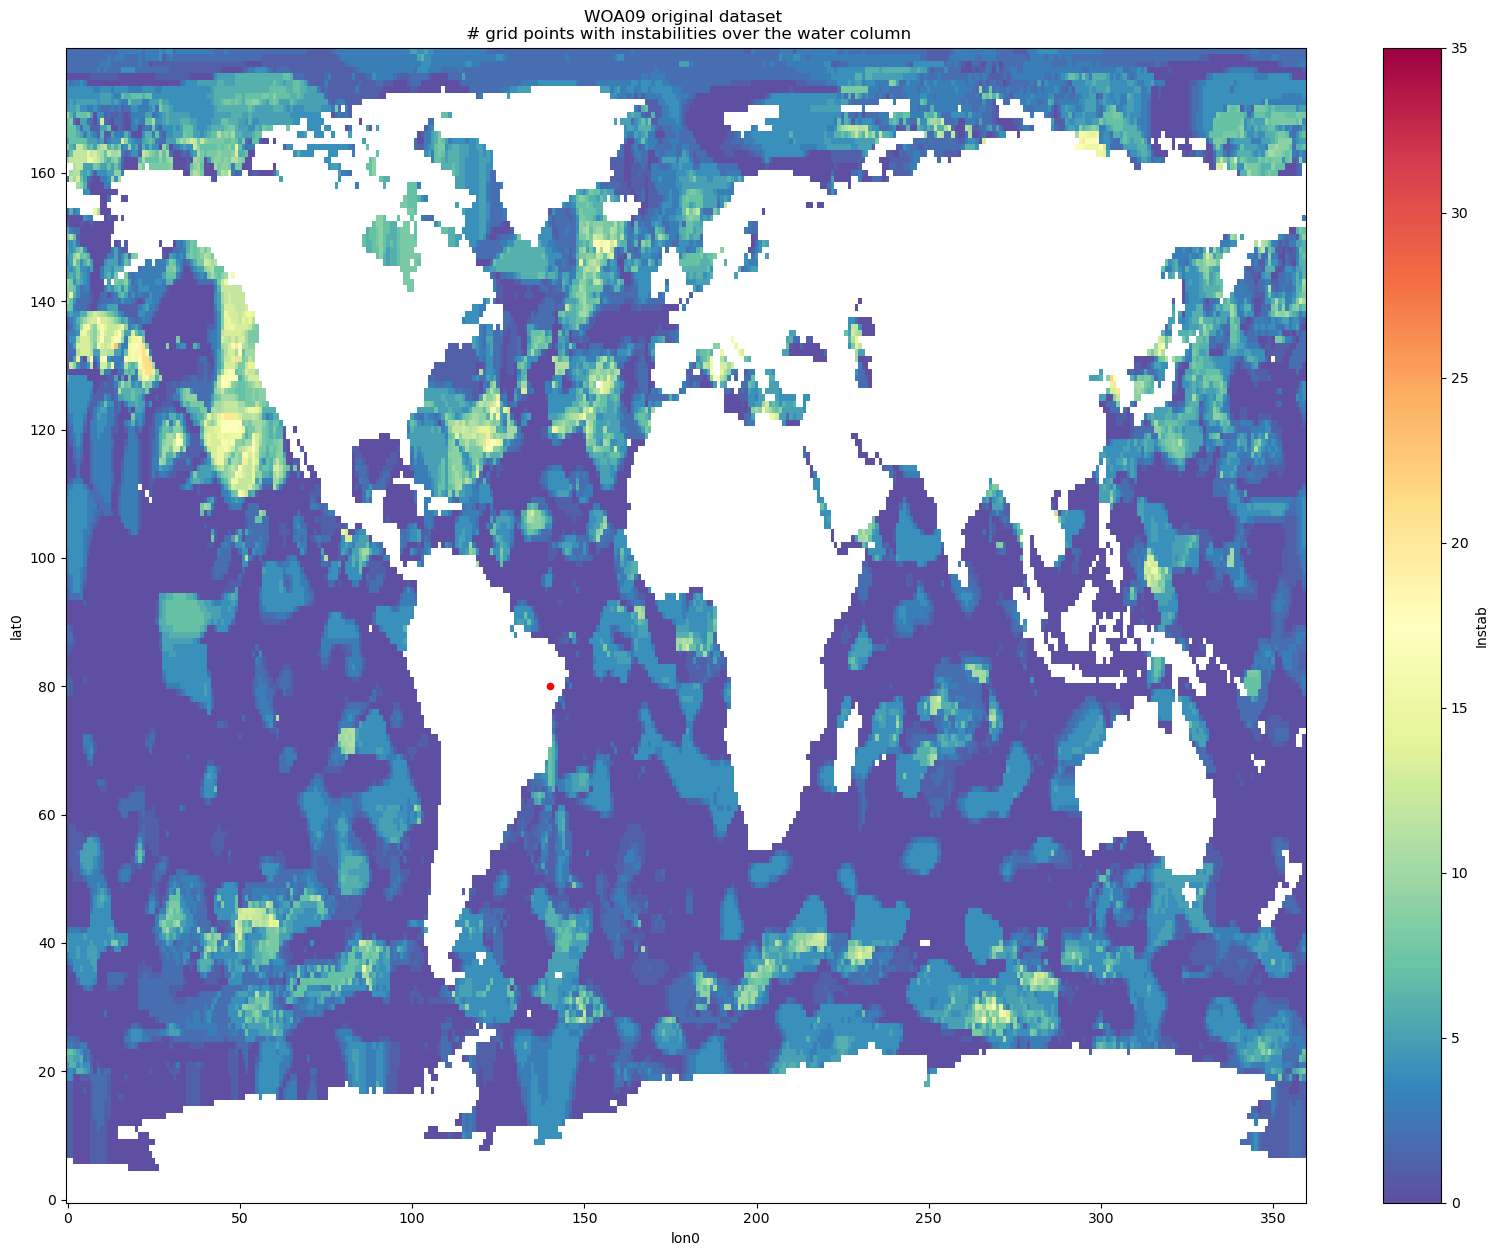

In [72]:
plt.figure(figsize=(20,15))
ds_IN['Instab'].plot(cmap='Spectral_r',vmax=35)
# Latitude & longitude
loc_x=140  ;  loc_y=80
plt.scatter(loc_x,loc_y,20,marker='o', color='r')
plt.title( 'WOA09 dataset after stabilisation with GSW \n # grid points with instabilities over the water column \n 1deg & 75 z-levels')

/tmp/ipykernel_4160/2790957951.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pal = plt.cm.get_cmap('binary')


Text(0.5, 1.0, 'WOA09 original dataset \n # grid points with instabilities over the water column')

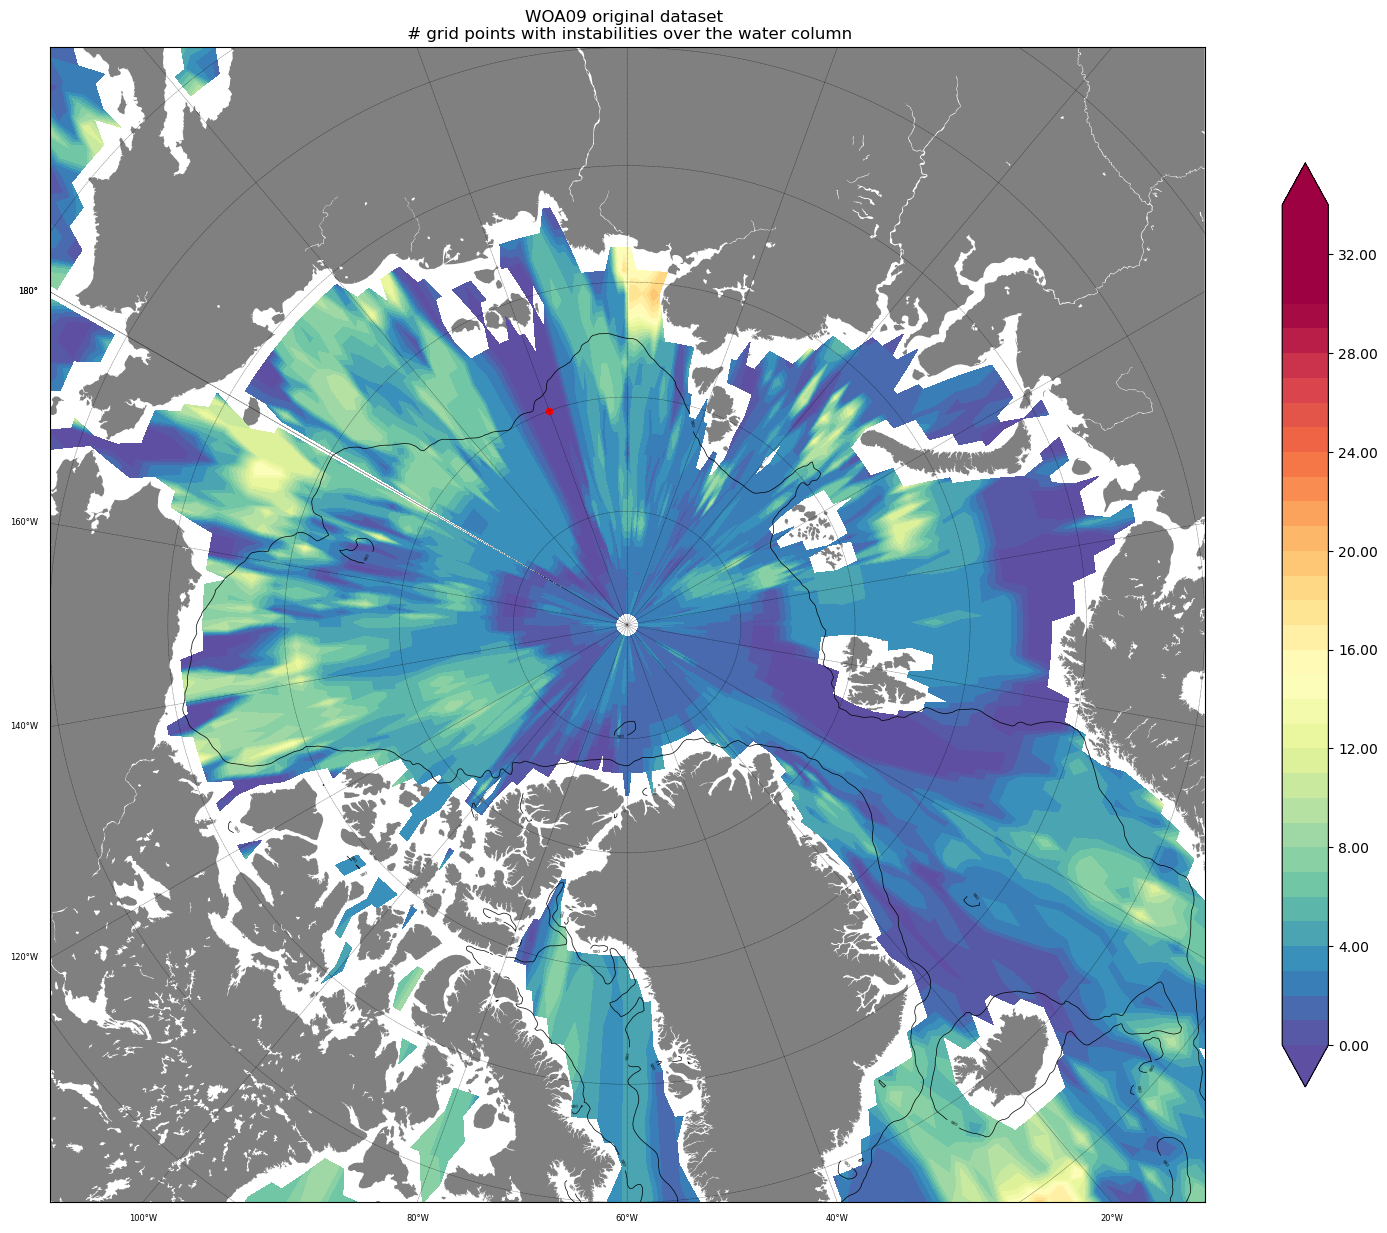

In [73]:
plt.figure(figsize=(20,15))
Arc_Bat(ztype='isol500')
m=Arc_plot(ds_IN['lon'].data,ds_IN['lat'].data,ds_IN['Instab'],np.arange(0,35),[0.,30.],zmy_cmap='Spectral_r')
x,y = m(loc_x,loc_y)
m.scatter(x,y,20,marker='o', color='r')
plt.title( 'WOA09 dataset after stabilisation with GSW \n # grid points with instabilities over the water column  \n 1deg & 75 z-levels')

KeyError: "no index found for coordinate 'lat'"

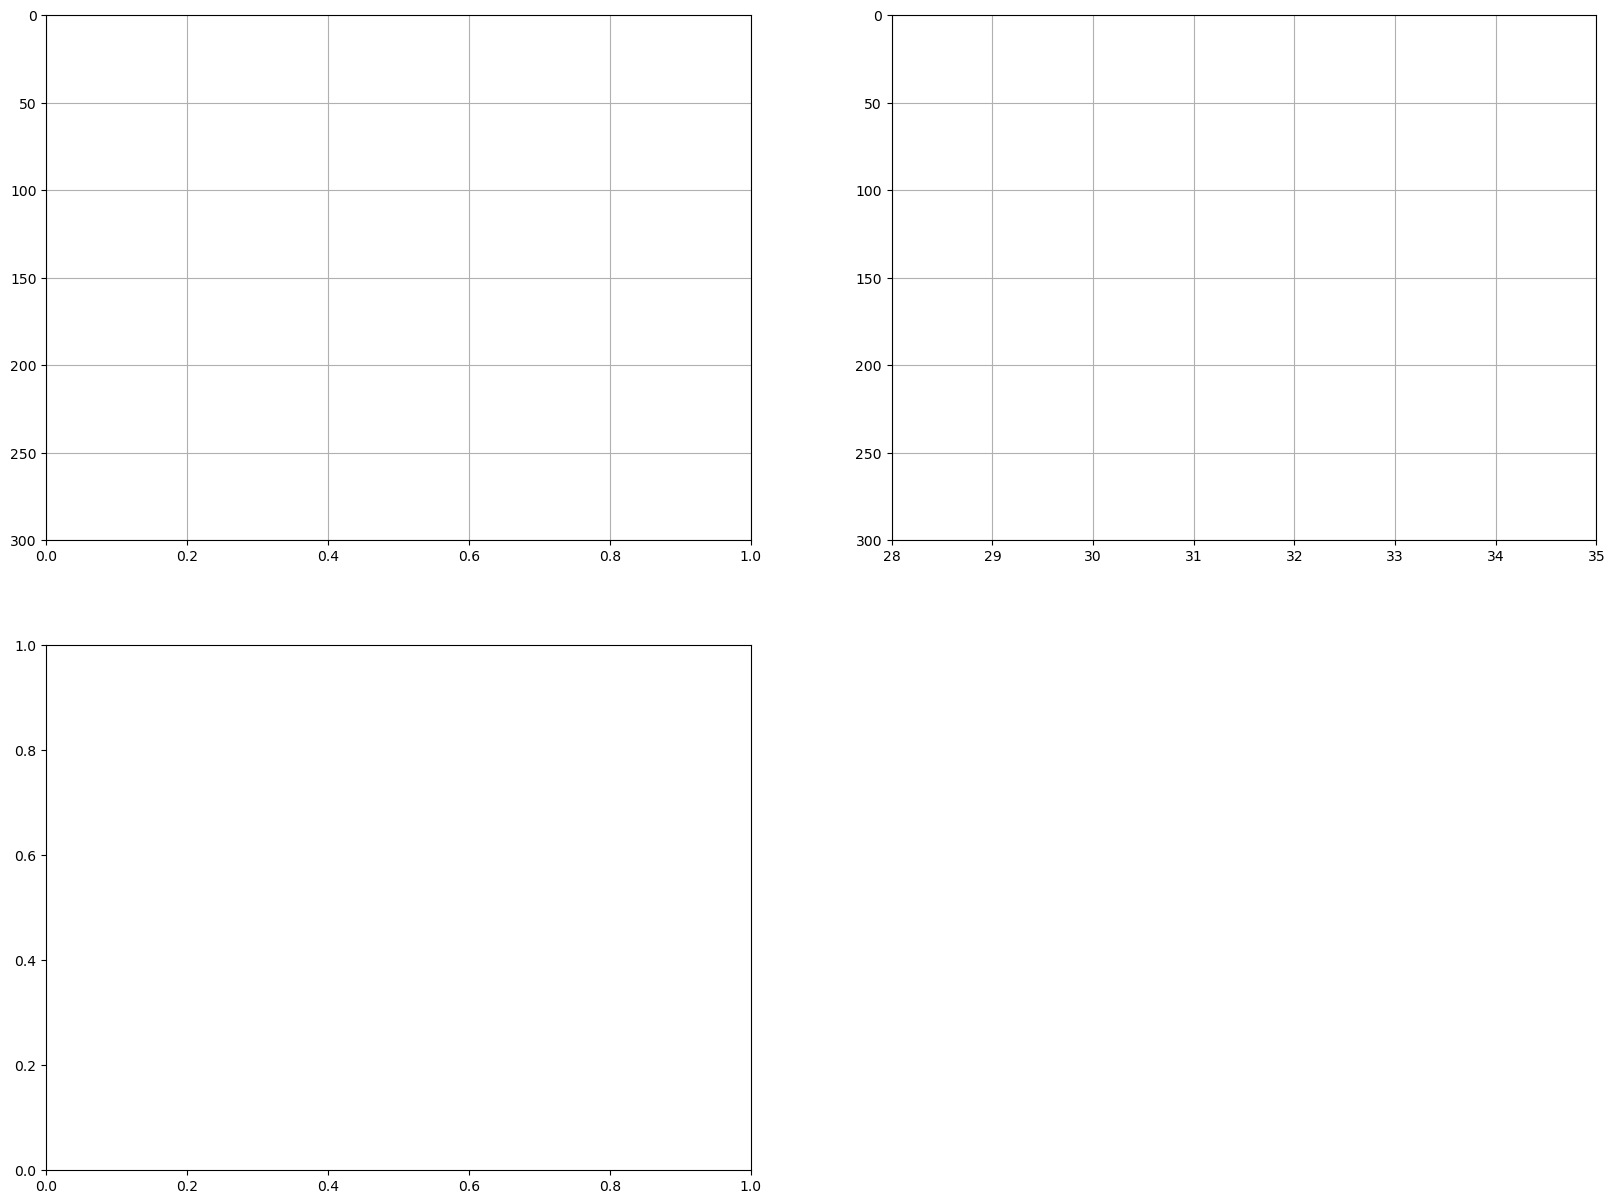

In [61]:
plt.figure(figsize=(20,15))

# Latitude & longitude
loc_x=140.  ;  loc_y=80.

plt.subplot(221)
#ds_IN['t_an'].isel(time_counter=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot.line(y='depth',marker='*')
#ds_IN['CT'].isel(time_counter=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot(y='depth')
plt.ylim([300,0.])
plt.grid(True)

plt.subplot(222)
#ds_IN['s_an'].isel(time_counter=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot.line(y='depth',marker='*')
#ds_IN['SA'].isel(time_counter=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot(y='depth')
plt.xlim([28,35.])
plt.ylim([300,0.])
plt.grid(True)

if True:
    plt.subplot(223)
    ds_N2['N2'].sel(lat=loc_y,lon=loc_x).plot(y='depth',marker='*')
    plt.xlim([-0.5e-5,5e-5])
    plt.ylim([300,0.])
    plt.grid(True)



In [60]:
ds_N2

<xarray.Dataset>
Dimensions:  (depth: 74, lat0: 180, lon0: 360, z: 75)
Coordinates:
    lat      (lat0, lon0) float32 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5
    lon      (lat0, lon0) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
    depth    (z, lat0, lon0) float32 ...
Dimensions without coordinates: lat0, lon0, z
Data variables:
    N2       (depth, lat0, lon0) float64 nan nan nan nan nan ... 0.0 0.0 0.0 0.0

In [62]:
print(ds_N2['N2'].sel(lat=loc_y,lon=loc_x,method='nearest'))

KeyError: "no index found for coordinate 'lat'"

# Output new fields 

In [29]:
if True:
    INDIR="./CREG12.L75-I/"
    ds_out=xr.Dataset()
    # Save WOA09 Practical Salinity 
    ds_out['s_an']=(('time_counter','z','lat0','lon0'),ds_SP.values)
    #ds_out['lat']=(('lat0','lon0'),ds_inS['lat'].values)
    #ds_out['lon']=(('lat0','lon0'),ds_inS['lon'].values)
    ds_out.attrs['History']='This salinity field has been stabilise using GSW gsw_stabilise_SA_const_t function, i.e. without changing the temperature'
    #ds_out.to_netcdf(INDIR+'woa09_salinity_monthly_1deg_s_an_CMA_drowned_Ex_L75_stabilise.nc',unlimited_dims='time_counter')
    ds_out.to_netcdf(INDIR+'stabilise.nc',unlimited_dims='time_counter')